# Segmention & Clustering Shopping Customers

* **Problem statement :**  understand the Target Customers for the marketing team to plan a strategy.

* **Context :**  Client want to identify the most important shopping groups based on income, age and the mall shopping score.
* He wants the ideal number of groups with a label for each.

## Objective Market Segmentation

* Divide the mall target market into apporoachable groups.
* Create subset on demographics behavioral criteria to better understand the target for marketing activities.

# The Approach

* Perform some quick EDA
* Use K-Means Clustering Algorithm to create our segments.
* Use Summery statistics on the cluster
* visualize

## Analysis

**Target Cluster**

* Target group would be cluster1.Which has a high Spending Score and high income.
* 60 persent of cluster1 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster.
* Cluster2 presents an interesting opportunity to market to the customers for sales event on popular items.

## Upload the libreries 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

## Uploading the dataset 

In [15]:
# !pip install --upgrade seaborn

In [16]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
#  Renameing the columns
new_column_names = {
    'CustomerID': 'Customer_ID',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}

df.rename(columns=new_column_names, inplace=True)

#  Exploratory Data Analysis

## Univariate Analysis

In [35]:
# Looking the dataset statistical
df.describe()

,Customer_ID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Annual_Income', ylabel='Density'>

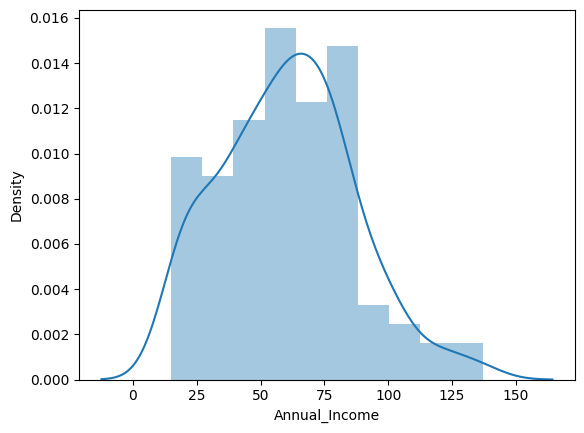

In [38]:
sns.distplot(df['Annual_Income'])

> It's a normal distribution of Annual Income.

In [39]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

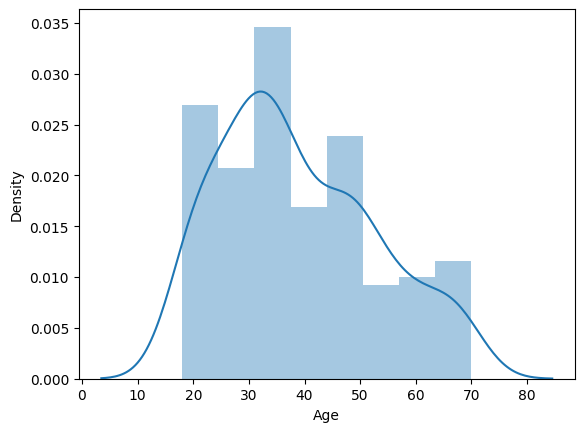

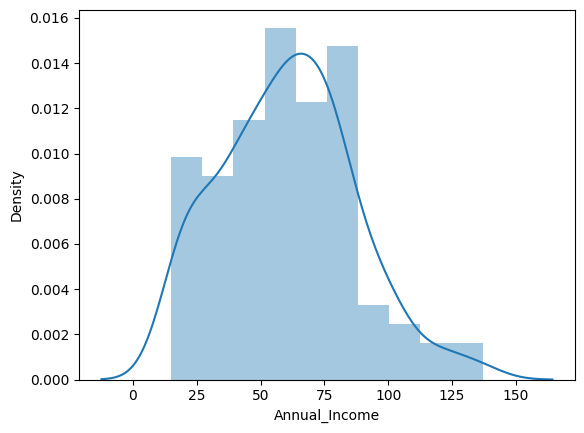

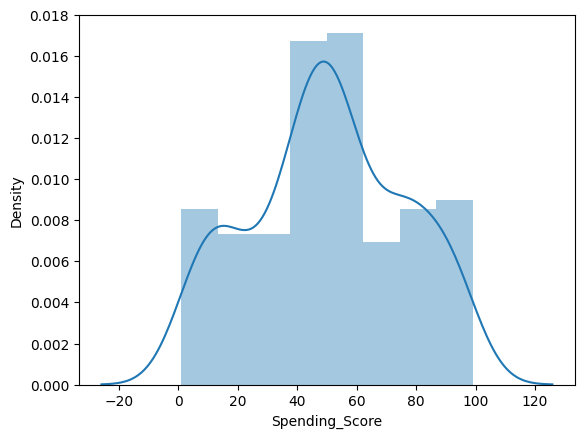

In [41]:
columns = ['Age','Annual_Income','Spending_Score']

for i in columns:
    plt.figure()
    sns.distplot(df[i])

> * Most of shoppers age is between 30-35.
> * Most of shoppers income is between 60-70k .
> * Most of shoppers Spending_Score is between 45-50.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

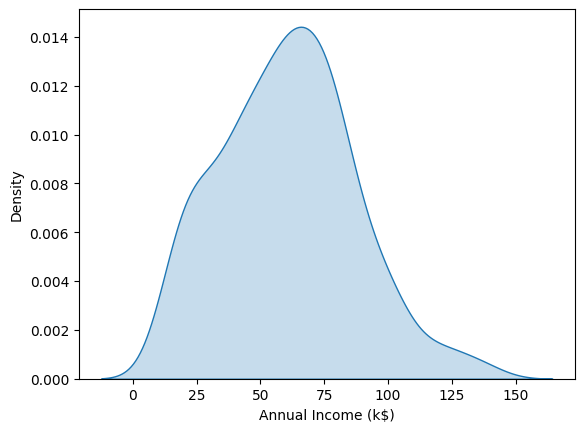

In [23]:
sns.kdeplot(df['Annual_Income'],shade=True)

<Axes: xlabel='Annual_Income', ylabel='Density'>

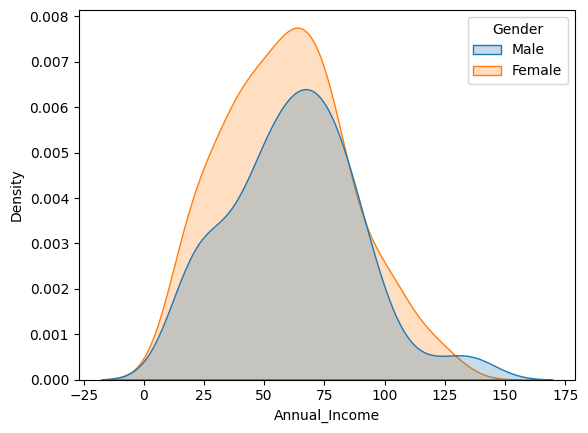

In [42]:
sns.kdeplot(data=df, x='Annual_Income', hue='Gender', shade=True)

> this plot show the Female Shoppers annual income is higher than Male Shoppers.

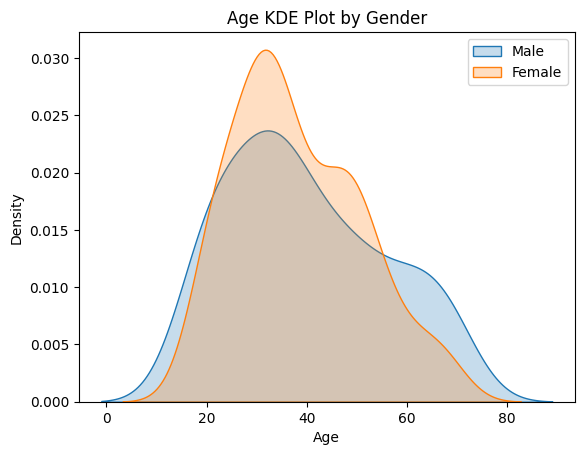

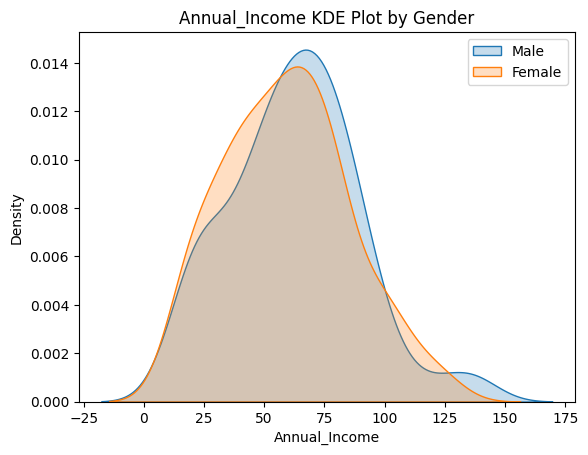

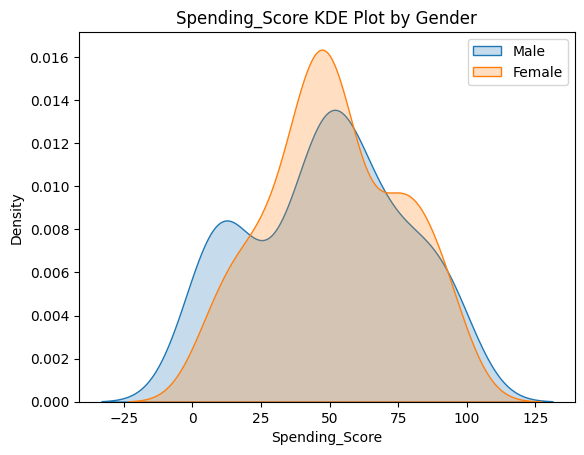

In [43]:
for i in columns:
    plt.figure()
    sns.kdeplot(df[df['Gender'] == 'Male'][i], shade=True, label='Male')
    sns.kdeplot(df[df['Gender'] == 'Female'][i], shade=True, label='Female')
    plt.title(f'{i} KDE Plot by Gender')
    plt.legend()
    plt.show()

> * Most of male shoppers age is between 30-35 while most of female shoppers age is between 28-32.
> * Male Shoppers(75k-80k) annual income is higher than Female Shoppers(60k-70k) *dollor*.
> * Female Shoppers Spending_Score is higher than Male Shopper Spending_Score and male shoppers spending_score has more variations then female shoppers.

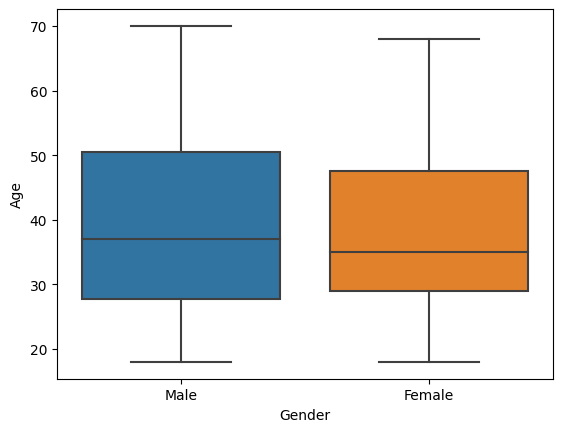

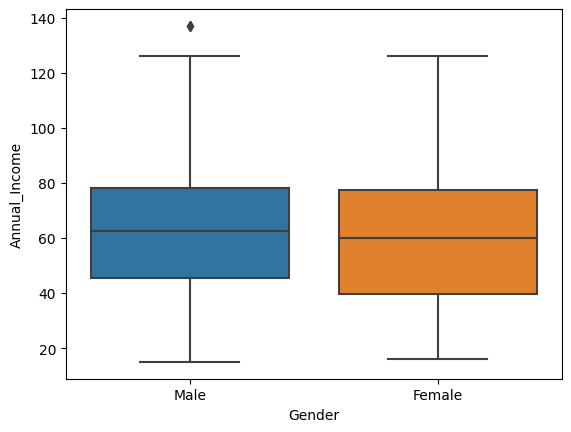

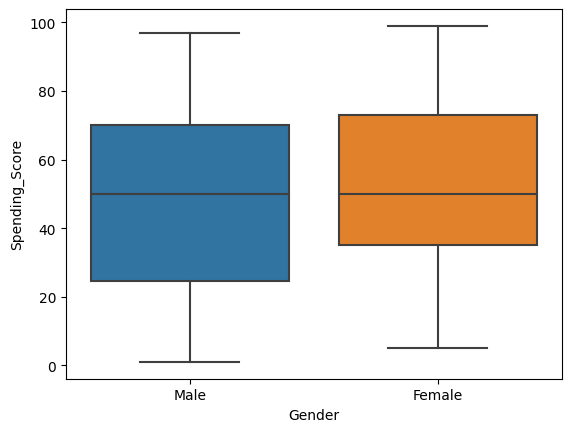

In [44]:
#  Checking the outliers

columns = ['Age', 'Annual_Income','Spending_Score']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [45]:
#  count the each gender
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis 

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

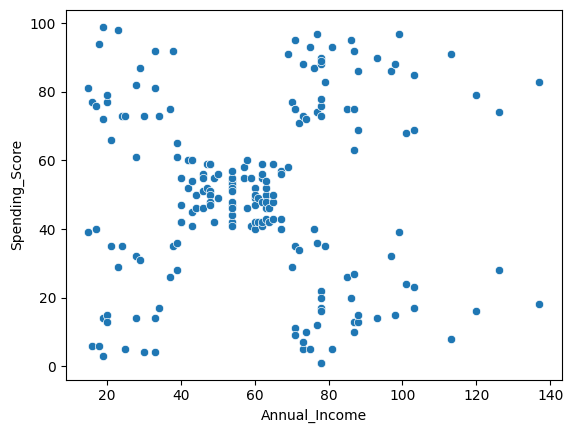

In [46]:
#  Checking the distribution

sns.scatterplot(data=df, x='Annual_Income',y='Spending_Score' )

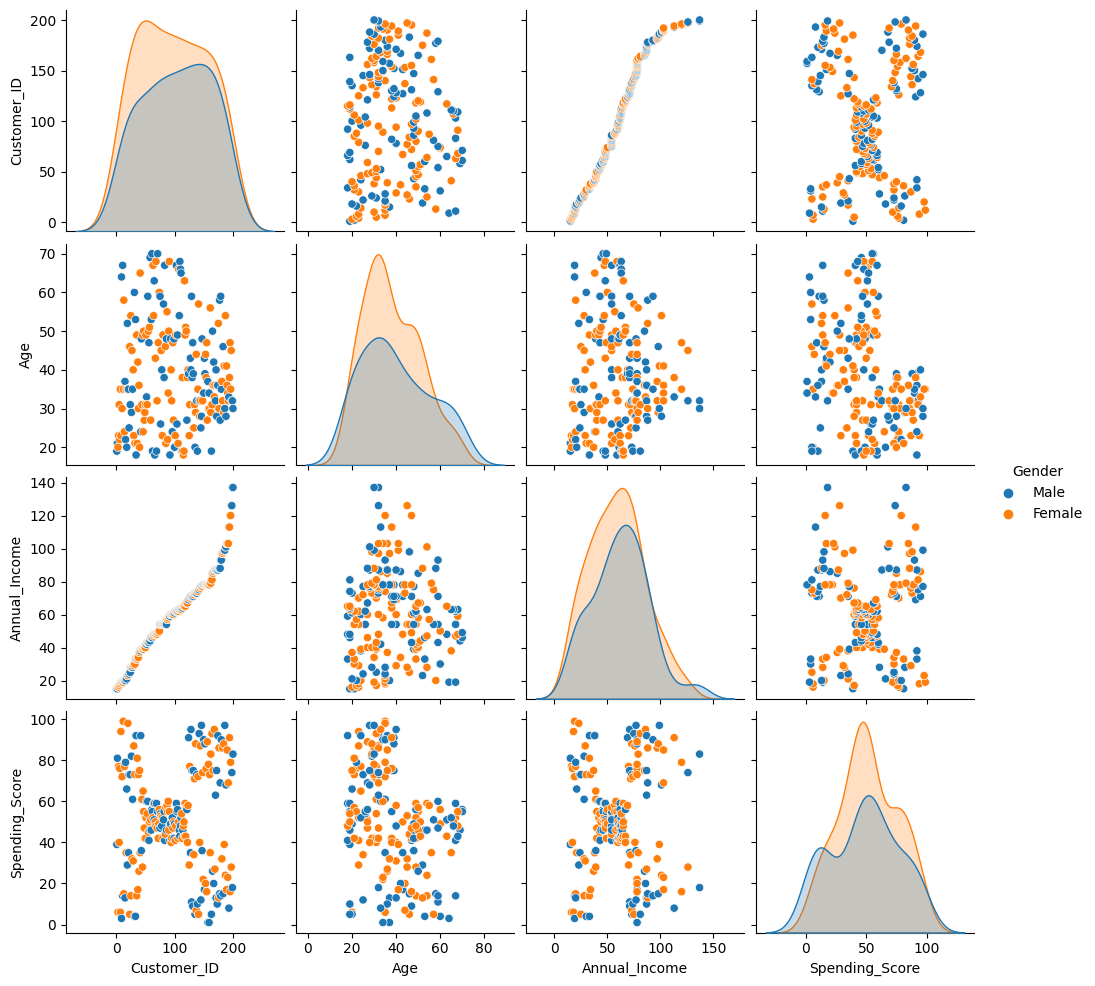

In [47]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [50]:
# Grouping the gender columns with other columns to know the mean value
df.groupby('Gender')[['Age', 'Annual_Income', 'Spending_Score']].mean()

,Age,Annual_Income,Spending_Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [65]:
# Creating correlation matrix to analyze the age, annual income and spending score

numeric_columns = df[['Age', 'Annual_Income', 'Spending_Score']]
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


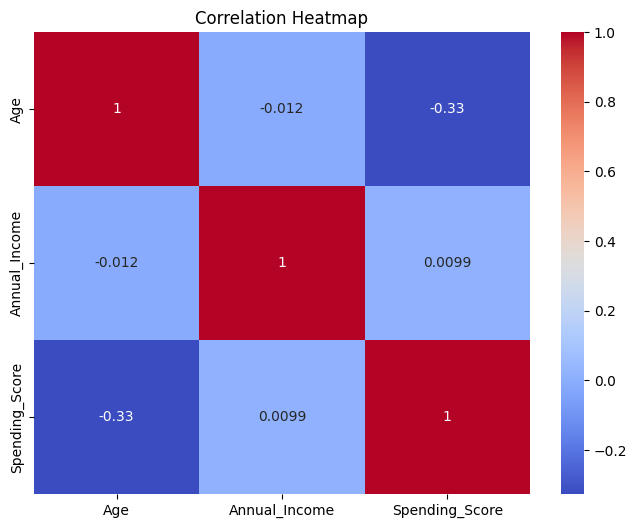

In [55]:
# draw the heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Clustering - Univariate, Bivariate, Multivariate

## Univariate 

In [69]:
clustering1 = KMeans(n_clusters=3) 

In [70]:
clustering1.fit(df[['Annual_Income']])

KMeans(n_clusters=3)

In [71]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [72]:
df['Income_Cluster'] = clustering1.labels_
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Income_Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [74]:
df['Income_Cluster'].value_counts()

Income_Cluster
2    90
1    74
0    36
Name: count, dtype: int64

> We can see the mejority of cluster are in Income Cluster 2.

In [75]:
# Elbow method 
clustering1.inertia_

23517.330930930926

In [76]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual_Income']])
    intertia_scores.append(kmeans.inertia_)

In [77]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472488,
 8481.496190476191,
 5081.48466026727,
 3981.15,
 2857.4416971916976,
 2266.0718020541553,
 1743.4772727272727]

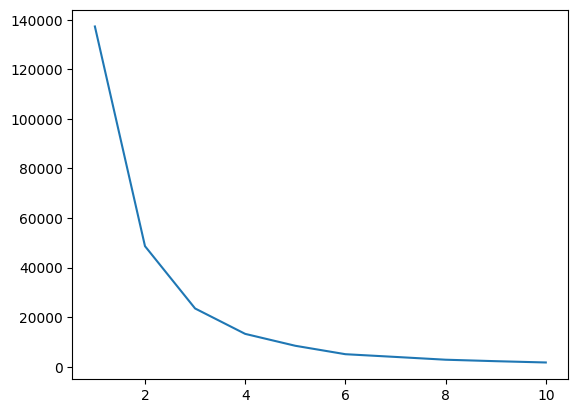

In [78]:
plt.plot(range(1,11),intertia_scores)

In [79]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Income_Cluster'],
      dtype='object')

In [81]:
# Grouping the Income Cluster with others columns for mean of each data

df.groupby('Income_Cluster')[['Age', 'Annual_Income',
       'Spending_Score']].mean()

,Age,Annual_Income,Spending_Score
Income_Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


## Bivariate Clustering

In [86]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual_Income','Spending_Score']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,1


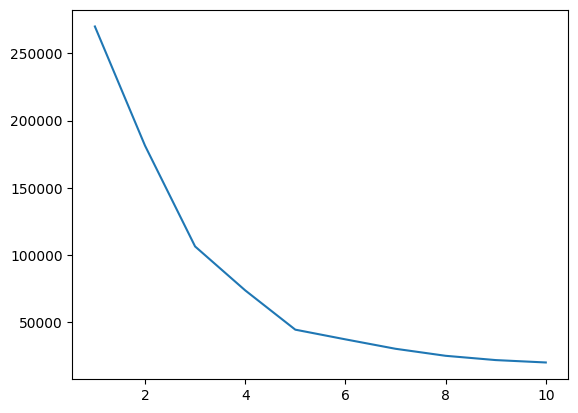

In [87]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual_Income','Spending_Score']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

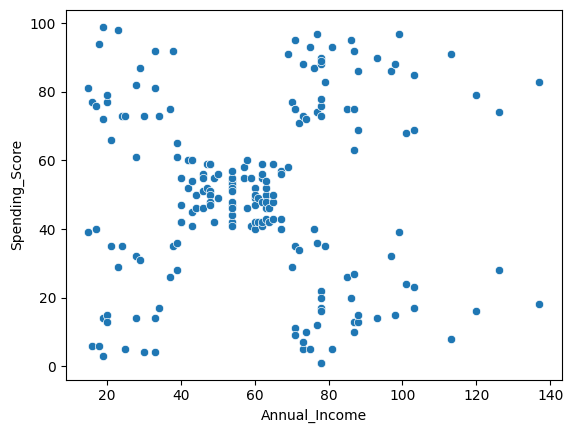

In [117]:
sns.scatterplot(data=df, x ='Annual_Income',y='Spending_Score',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [119]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

In [121]:
centers

,x,y
0,88.200000,17.114286
1,26.304348,20.913043
2,25.727273,79.363636
3,55.296296,49.518519
4,86.538462,82.128205


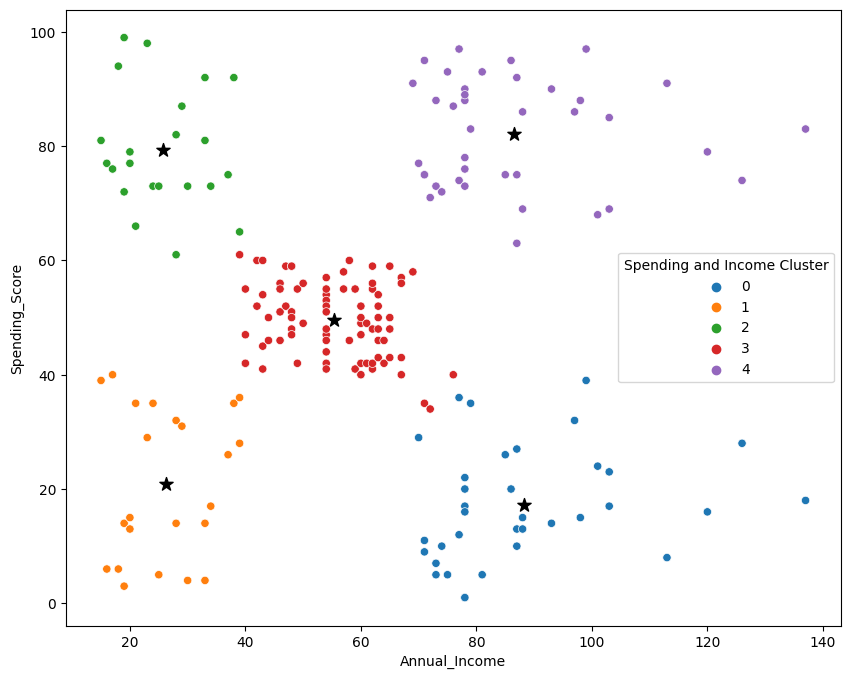

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual_Income',y='Spending_Score',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [91]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.608696,0.391304
2,0.590909,0.409091
3,0.592593,0.407407
4,0.538462,0.461538


In [92]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual_Income',
       'Spending_Score']].mean()

,Age,Annual_Income,Spending_Score
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,45.217391,26.304348,20.913043
2,25.272727,25.727273,79.363636
3,42.716049,55.296296,49.518519
4,32.692308,86.538462,82.128205


## Multivariate Clustering

In [93]:
#multivariate clustering 
from sklearn.preprocessing import StandardScaler

In [94]:
scale = StandardScaler()

In [95]:
df.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,1


In [122]:
#  Change the gender column so we can run the algorithm

dff = pd.get_dummies(df, drop_first=True)
dff['Gender_Male'] = dff['Gender_Male'].astype(int)  # Convert True/False to 0/1
dff.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Income_Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,1,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,1,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,1,0


In [101]:
dff.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Spending_Score',
       'Income_Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [102]:
dff = dff[['Age', 'Annual_Income', 'Spending_Score','Gender_Male']]
dff.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [123]:
dff = scale.fit_transform(dff)
dff

array([[-1.7234121 , -1.42456879, -1.73899919, ..., -0.36174054,
        -0.96715124,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919, ..., -0.36174054,
        -0.23996986,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, ..., -0.36174054,
        -0.96715124, -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745, ..., -1.70152033,
         1.21439291,  1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, ..., -1.70152033,
        -1.69433263,  1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117, ..., -1.70152033,
         1.21439291,  1.12815215]])

In [124]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5,6
0,-1.723412,-1.424569,-1.738999,-0.434801,-0.361741,-0.967151,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-0.361741,-0.239970,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.361741,-0.967151,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.361741,-0.239970,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.361741,-0.967151,-0.886405


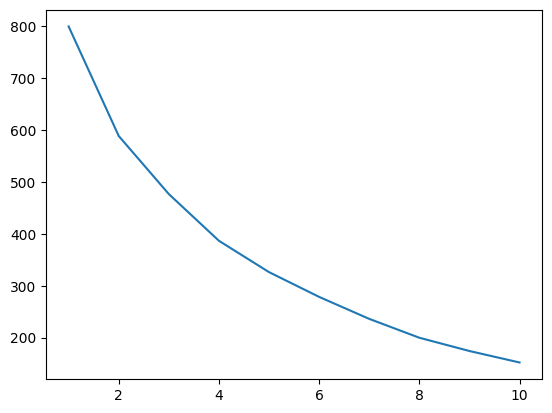

In [105]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [112]:
df

,Customer_ID,Gender,Age,Annual_Income,Spending_Score,Income_Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,4
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,0,4
198,199,Male,32,137,18,0,0


In [113]:
df.to_csv('Clustering.csv')